## Challenge: What test to use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Who reported watching more TV in 2012, men or women?
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Submit a link to your work below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.shape

(8594, 13)

In [3]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
df.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0
8593,SE,3746.0,7,2.0,6.0,7.0,5.0,7.0,7.0,4.0,2.0,15.0,2.0


In [5]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [6]:
df.dtypes

cntry       object
idno       float64
year         int64
tvtot      float64
ppltrst    float64
pplfair    float64
pplhlp     float64
happy      float64
sclmeet    float64
sclact     float64
gndr       float64
agea       float64
partner    float64
dtype: object

In [7]:
df.isna().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

## 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample. 



In [66]:
countries = df.cntry.unique().tolist()
countries

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

* year 6 = year 12
* year 7 = year 14
*****************
* CH=Switzerland
* CZ=Czech Republic
* DE=Germany
* ES=Spain
* NO=Norway
* SE=Sweden

In [67]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


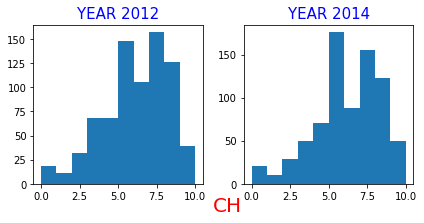

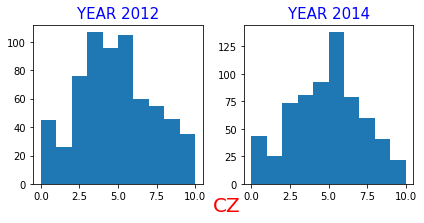

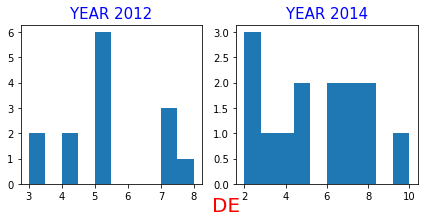

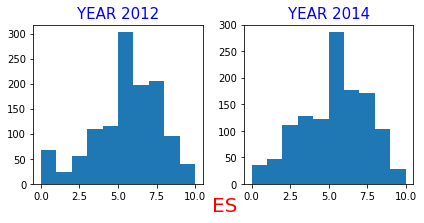

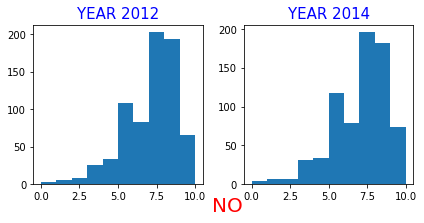

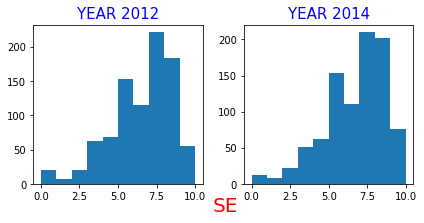

In [68]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country, size = 20, color='r')
    axs[0].set_title('YEAR 2012', size = 15, color='blue')
    axs[1].set_title('YEAR 2014', size = 15, color='blue')
    
    plt.tight_layout()
    plt.show()

#### All participants experience both versions. Use Paired sample t-test or Wilcoxon signed-rank depending on distibution.

### Using a parametric paired t-test,

In [10]:
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))


 CH
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

 CZ
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 DE
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

 ES
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)

 NO
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

 SE
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


#### ES(Spain) & SE(Sweden) are the countries with a significant difference between year 2012 & 2014 with both pvalue=0.014 & pvalue=0.039 respectively. The trust in Spain decreases and increase in sweden.

### Use Tukey's Honest Significance Differences Test

In [11]:
np.set_printoptions(threshold=np.inf)
countries = df.cntry.unique()
for country in countries:
    country_df = df[df.cntry == country]
    country_df = country_df[np.isfinite(country_df['ppltrst'])]
    trusting = np.asarray(country_df['ppltrst'].tolist())
    year = np.asarray(country_df['year'])

    tukey = pairwise_tukeyhsd(endog=trusting,      # Data
                              groups=year,   # Groups
                              alpha=0.05)         # Significance level
    
    print('\nCountry: ', country)
    year6_mean = country_df[country_df.year == 6]['ppltrst'].mean()
    year7_mean = country_df[country_df.year == 7]['ppltrst'].mean()
    print('Year 6 mean: ', year6_mean)
    print('Year 7 mean: ', year7_mean)
    print(tukey.summary())
    if (year7_mean > year6_mean) & (tukey.reject == True):
        print('The people of {} became more trusting in 2014.\n'.format(country))
    else:
        print('The people of {} did not became more trusting in 2014.\n'.format(country))


Country:  CH
Year 6 mean:  5.677878395860285
Year 7 mean:  5.751617076326003
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     6      7   0.0737 0.4977 -0.1395 0.287  False
--------------------------------------------------
The people of CH did not became more trusting in 2014.


Country:  CZ
Year 6 mean:  4.362519201228879
Year 7 mean:  4.424657534246576
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     6      7   0.0621 0.6444 -0.1937 0.3179  False
---------------------------------------------------
The people of CZ did not became more trusting in 2014.


Country:  DE
Year 6 mean:  5.214285714285714
Year 7 mean:  5.357142857142857
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
----------------------------------

#### Using Tukey, The trust in Spain decreases while the trust in Sweden increase from year 2012-2014. Other countries has no significant difference, no changes in trust.

### Use Non-normality function for De(Germany)

In [12]:
stats.wilcoxon

<function scipy.stats.morestats.wilcoxon(x, y=None, zero_method='wilcox', correction=False)>

In [69]:
print('DE non-parametric')
print('2012 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==6)].median()))
print('2014 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==7)].median()))  
print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                     df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                     zero_method='wilcox'
                    ))

DE non-parametric
2012 median: 5.00
2014 median: 5.50
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


#### Using the non-normality function, there was a significant difference between the trust in year2012 & year2014 and the trust was increase for country Germany.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

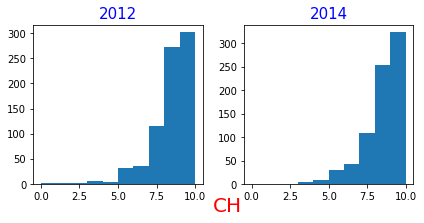

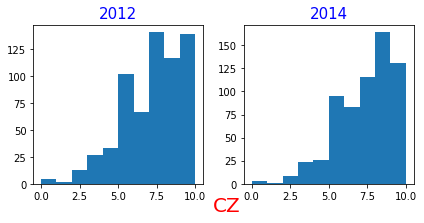

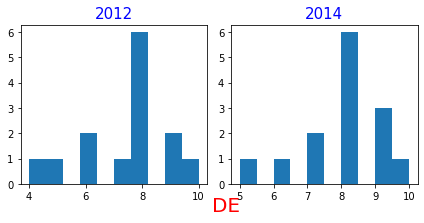

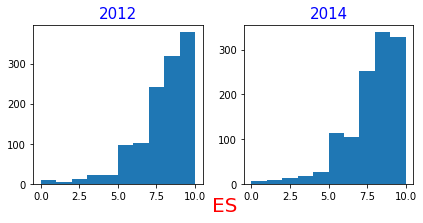

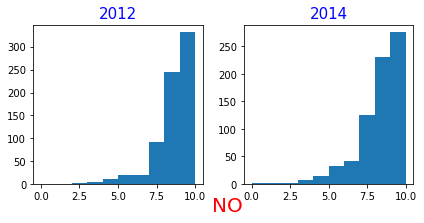

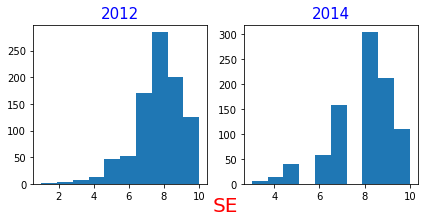

In [14]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country, size = 20, color='r')
    axs[0].set_title('2012', size = 15, color='blue')
    axs[1].set_title('2014', size = 15, color='blue')
    
    plt.tight_layout()
    plt.show()

#### Shown in the plot that the data skewed to the left, we used the non-parametric

In [15]:
print('Non-parametric')
for country in countries:
    print('\n', country)
    print('2012 median: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==6)].median()))
    print('2014 median: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==7)].median()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                         df['happy'][(df['cntry'] == country) & (df['year']==7)],
                         zero_method='wilcox'
                        ))

Non-parametric

 CH
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

 CZ
2012 median: 7.00
2014 median: 7.00
WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

 DE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 ES
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

 NO
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

 SE
2012 median: 8.00
2014 median: 8.00
WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


#### CZ and ES had significant difference in happiness between 2012 & 2014. The median is the same in value so we can not say if happiness increase or decrease.

### Compare to parametric paired T-test:

In [16]:
print('Parametric')
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))

Parametric

 CH
2012 mean: 8.09
2014 mean: 8.12
Ttest_relResult(statistic=-0.319412957862232, pvalue=0.7495001355429063)

 CZ
2012 mean: 6.77
2014 mean: 6.91
Ttest_relResult(statistic=-1.4561384833039597, pvalue=0.1458454843389451)

 DE
2012 mean: 7.43
2014 mean: 7.86
Ttest_relResult(statistic=-0.8062257748298549, pvalue=0.4346138707734991)

 ES
2012 mean: 7.55
2014 mean: 7.42
Ttest_relResult(statistic=1.613832417735418, pvalue=0.10682451556479494)

 NO
2012 mean: 8.25
2014 mean: 7.92
Ttest_relResult(statistic=4.2856826576235925, pvalue=2.067453013405473e-05)

 SE
2012 mean: 7.91
2014 mean: 7.95
Ttest_relResult(statistic=-0.5581637086030012, pvalue=0.5768709591233714)


#### When using parametric t-test,  No changes in happiness between yr2012 & 2014.

### 3. Who reported watching more TV in 2012, men or women?

Independent t-test for normal(ish) distributions

In [19]:
df.head()
# gender 1 = male
# gender 2 = female
# yr 6 = yr12

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [20]:
df.tvtot.unique()

array([ 3.,  6.,  1.,  4.,  5.,  2.,  0.,  7., nan])

In [21]:
df.gndr.unique()

array([ 2.,  1., nan])

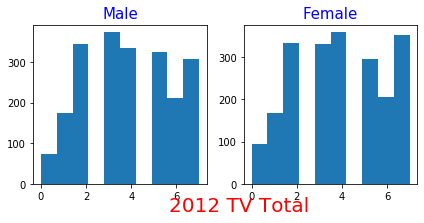

In [70]:
male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(male.dropna())
axs[1].hist(female.dropna())

fig.text(0.4, 0, '2012 TV Total',  size = 20, color='r')
axs[0].set_title('Male',  size = 15, color='blue')
axs[1].set_title('Female',  size = 15, color='blue')
    
plt.tight_layout()
plt.show()

In [24]:
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [74]:
print('Male mean: {0:.2f}'.format(male.mean()))
print('Female mean: {0:.2f}'.format(female.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.90
Female mean: 3.94
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


#### There is no significant difference in watching movie between men & women in 2012.

### Use non-parametric

In [71]:
stats.kruskal

<function scipy.stats.stats.kruskal(*args, **kwargs)>

In [77]:
#tv_df = pd.DataFrame()

men_2012 = df[df.gndr == 1.0]
women_2012 = df[df.gndr == 2.0]

men_ranks = stats.rankdata(men_2012['tvtot'].tolist())
women_ranks = stats.rankdata(women_2012['tvtot'].tolist())

print(men_ranks.mean())
print(women_ranks.mean())
 
tv_means = stats.kruskal(men_2012['tvtot'], women_2012['tvtot'], nan_policy='omit' )

print('\n')
print(tv_means)

if tv_means.pvalue > 0.05:
    print('\nThere is no statistically significant difference between male and female TV habits')

2158.5
2134.5


KruskalResult(statistic=2.4779756437672162, pvalue=0.11545076240534108)

There is no statistically significant difference between male and female TV habits


### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [26]:
df.head()
#partner 1 = lives with someone
#partner 2 = lives alone
# yr 6 = yr2012

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


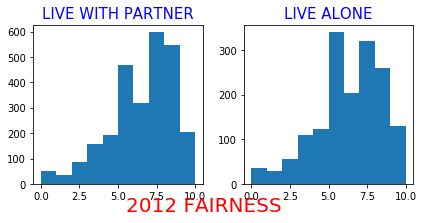

In [27]:
with_partner = df['pplfair'][(df['partner']==1.0) & (df['year']==6)]
alone = df['pplfair'][(df['partner']==2.0) & (df['year']==6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(with_partner.dropna())
axs[1].hist(alone.dropna())

fig.text(0.3, 0, '2012 FAIRNESS', size = 20, color='r')
axs[0].set_title('LIVE WITH PARTNER', size = 15, color='b')
axs[1].set_title('LIVE ALONE', size = 15, color='b')

plt.tight_layout()
plt.show()

In [28]:
print('PEOPLE LIVE PARTHNER MEAN: {0:3f}'.format(with_partner.mean()))
print('LIVE ALONE MEAN: {0:3f}'.format(alone.mean()))
print(stats.ttest_ind(with_partner,
                     alone, 
                     nan_policy = 'omit'))

PEOPLE LIVE PARTHNER MEAN: 6.080736
LIVE ALONE MEAN: 5.856965
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


#### People live with partner believes that people were fair in 2012.  

### Use non-parametric

In [85]:
with_partner = df[df.partner == 1.0]
alone = df[df.partner == 2.0]

with_partner_ranks = stats.rankdata(with_partner['pplfair'].tolist())
alone_ranks = stats.rankdata(alone['pplfair'].tolist())

print(with_partner_ranks.mean())
print(alone_ranks.mean())
 
fair_means = stats.kruskal(with_partner['pplfair'], alone['pplfair'], nan_policy='omit' )

print('\n')
print(fair_means)

if fair_means.pvalue > 0.05:
    print('\nThere is no statistically significant difference of belief if people are fair in 2012 between of married and single')
else:
    print('\nThere is statistically significant difference of belief if people are fair in 2012 between of married and single' )
        

2638.5
1651.0


KruskalResult(statistic=13.798140191900169, pvalue=0.00020353761312822788)

There is statistically significant difference of belief if people are fair in 2012 between of married and single


### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014.  Are there differences, and if so, which countries stand out?

In [29]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [30]:
countries=['CH', 'CZ','NO']

In [32]:
CH_meet = df['sclmeet'][(df['cntry']== 'CH') & (df['year'] == 7)].dropna()
CZ_meet = df['sclmeet'][(df['cntry']== 'CZ') & (df['year'] == 7)].dropna()
NO_meet = df['sclmeet'][(df['cntry']== 'NO') & (df['year'] == 7)].dropna()

Text(0.5, 1.0, 'NO')

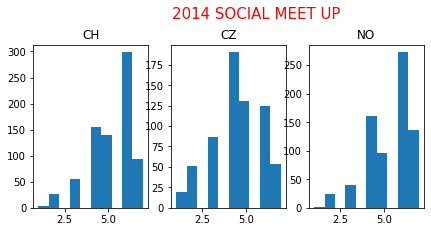

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(7, 3))

axs[0].hist(CH_meet)
axs[1].hist(CZ_meet)
axs[2].hist(NO_meet)

fig.text(0.4, 1, '2014 SOCIAL MEET UP', size = 15, color='r')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('NO')

Text(0.5, 1.0, 'NO')

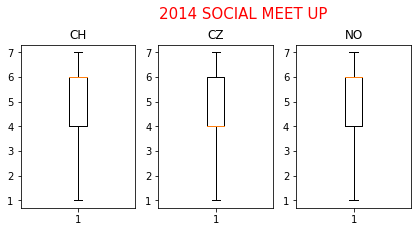

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(7, 3))

axs[0].boxplot(CH_meet)
axs[1].boxplot(CZ_meet)
axs[2].boxplot(NO_meet)

fig.text(0.4, 1, '2014 SOCIAL MEET UP', size = 15, color='r')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('NO')

In [36]:
stats.f_oneway

<function scipy.stats.stats.f_oneway(*args)>

In [37]:
F, p = stats.f_oneway(CH_meet, CZ_meet, NO_meet)
print('F statistic: ', F, '\np-value: ', p)

F statistic:  75.95511016819357 
p-value:  1.330045357440723e-32


In [38]:
print('CH mean:',CH_meet.mean() ,'CH count:', CH_meet.count())
print('CZ mean:',CZ_meet.mean() ,'CZ count:', CZ_meet.count())
print('NO mean:',NO_meet.mean() ,'NO count:', NO_meet.count())

print('\nCH-CZ: ',stats.ttest_ind(CH_meet, CZ_meet))
print('CH-NO: ', stats.ttest_ind(CH_meet, NO_meet))
print('CZ-NO: ',stats.ttest_ind(CZ_meet, NO_meet))

CH mean: 5.160621761658031 CH count: 772
CZ mean: 4.445801526717557 CZ count: 655
NO mean: 5.3023255813953485 NO count: 731

CH-CZ:  Ttest_indResult(statistic=9.675850699914886, pvalue=1.7204743885392493e-21)
CH-NO:  Ttest_indResult(statistic=-2.067962986557216, pvalue=0.03881448528868391)
Cz-NO:  Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)


#### One way ANOVA shows that there is a significant differences between groups. Using independent t-test to compare social encounter in each country show that there a significant difference when compared to each country. Norway are more social & Czeck Republic is least social between the 3 countries. 

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others in their age, in 2014.  Are there any differences?  If so, which countries stand out?

In [43]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [44]:
df.agea.value_counts()

54.0     170
46.0     169
42.0     165
52.0     163
39.0     157
        ... 
97.0       1
101.0      1
96.0       1
103.0      1
114.0      1
Name: agea, Length: 83, dtype: int64

In [45]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [46]:
countries=['CH', 'CZ','NO', 'ES']

In [ ]:
# Social Activity of age 25-50 yrs old between each country in year 2014

In [64]:
CH_act = df['sclact'][(df['cntry'] == 'CH') & (df['year']==7) & ((df['agea']>=25) & (df['agea']<=50))].dropna()
CZ_act = df['sclact'][(df['cntry'] == 'CZ') & (df['year']==7) & ((df['agea']>=25) & (df['agea']<=50))].dropna()
NO_act = df['sclact'][(df['cntry'] == 'NO') & (df['year']==7) & ((df['agea']>=25) & (df['agea']<=50))].dropna()
ES_act = df['sclact'][(df['cntry'] == 'ES') & (df['year']==7) & ((df['agea']>=25) & (df['agea']<=50))].dropna()


In [56]:
age_cats = []

for age in df['agea']:
    if (age < 26.0):
        age_cats.append('0-25')
    elif (age >= 26.0) & (age < 51.0):
        age_cats.append('25-50')
    elif (age >= 51.0) & (age < 76.0):
        age_cats.append('50-75')
    elif (age >= 76.0):
        age_cats.append('76-100')



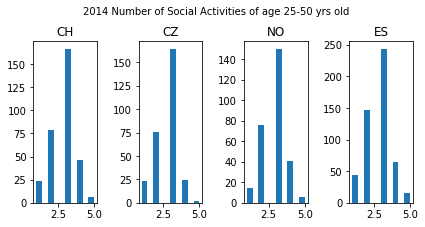

In [88]:
fig, axs = plt.subplots(1, 4, figsize=(6, 3))

axs[0].hist(CH_act)
axs[1].hist(CZ_act)
axs[2].hist(NO_act)
axs[3].hist(ES_act)

fig.text(0.2, 1, '2014 Number of Social Activities of age 25-50 yrs old')
axs[0].set_title('CH')
axs[1].set_title('CZ')
axs[2].set_title('NO')
axs[3].set_title('ES')
    
plt.tight_layout()
plt.show()

In [62]:
F, p = stats.f_oneway(CH_act, CZ_act, NO_act, ES_act)
print('F statistic:', F, '\np-value:', p)

F statistic: 1.8091206899453425 
p-value: 0.14357434447145748


In [65]:
print('CH: ', CH_act.mean(), CH_act.count())
print('CZ: ', CZ_act.mean(), CZ_act.count())
print('NO: ', NO_act.mean(), NO_act.count())
print('ES: ', ES_act.mean(), ES_act.count())

print('\nCH-CZ', stats.ttest_ind(CH_act, CZ_act))
print('CH-NO',stats.ttest_ind(CH_act, NO_act))
print('CH-ES',stats.ttest_ind(CH_act, ES_act))
print('CZ-NO',stats.ttest_ind(CZ_act, NO_act))
print('CZ-ES',stats.ttest_ind(CZ_act, ES_act))
print('NO-ES',stats.ttest_ind(NO_act, ES_act))

CH:  2.7850467289719627 321
CZ:  2.6747404844290656 289
NO:  2.822299651567944 287
ES:  2.7251461988304095 513

CH-CZ Ttest_indResult(statistic=1.677950024733471, pvalue=0.09387076060621836)
CH-NO Ttest_indResult(statistic=-0.5520715833642303, pvalue=0.5811028463919434)
CH-ES Ttest_indResult(statistic=0.9608804481701928, pvalue=0.33689144316089115)
CZ-NO Ttest_indResult(statistic=-2.2441198388044343, pvalue=0.025204986939294006)
CZ-ES Ttest_indResult(statistic=-0.8065008366042453, pvalue=0.420193809547585)
NO-ES Ttest_indResult(statistic=1.5248410199018034, pvalue=0.1276949545815156)


#### ANOVA test result shows that there is no significant differences in social activity between group. When comparing each group using the t_test_ind, there is a significant difference in social activity for the age 25-50 years old between Czech Republic and Norway. Norway people has more social activities than Czech Republic.